# Nested Dichotomous Data

## Quickstart

To run a nested dichotomous dataset:

In [24]:
%matplotlib inline
# tag: remove-cell applied

Nested Logistic (lsc+ilc+) Model
══════════════════════════════

Version: pybmds 25.2a2 (bmdscore 25.1)

Input Summary:
╒══════════════════════════════╤═══════════════════════╕
│ BMR                          │ 5% Extra Risk         │
│ Confidence Level (one sided) │ 0.95                  │
│ Litter Specific Covariate    │ Overall Mean (11.692) │
│ Intralitter Correlation      │ Estimate              │
│ Estimate Background          │ True                  │
│ Bootstrap Runs               │ 3                     │
│ Bootstrap Iterations         │ 1000                  │
│ Bootstrap Seed               │ 641                   │
╘══════════════════════════════╧═══════════════════════╛

Parameter Settings:
╒═════════════╤═══════════╤═══════╤════════╕
│ Parameter   │   Initial │   Min │    Max │
╞═════════════╪═══════════╪═══════╪════════╡
│ a           │         0 │     0 │  1     │
│ b           │         0 │   -18 │ 18     │
│ theta1      │         0 │     0 │  1     │
│ theta2      │    

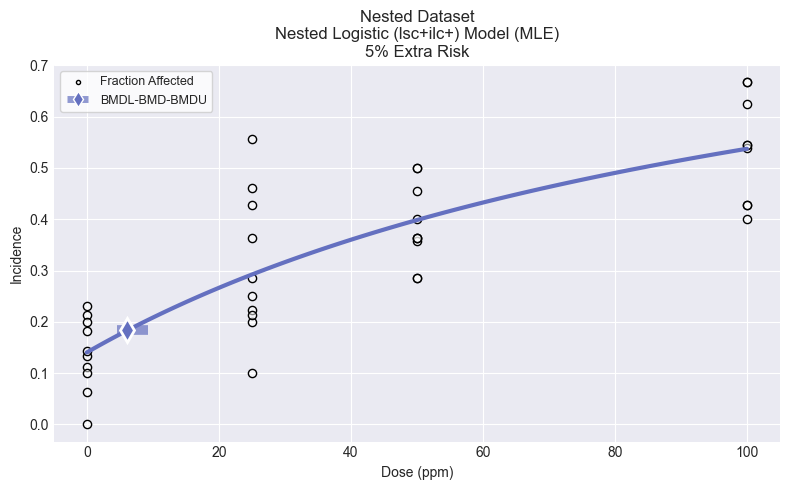

In [25]:
import pybmds

dataset = pybmds.NestedDichotomousDataset(
    name="Nested Dataset",
    dose_units="ppm",
    doses= [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        100, 100, 100, 100, 100, 100, 100, 100, 100
    ],
    litter_ns = [
        16, 9, 15, 14, 13, 9, 10, 14, 10, 11,
        14, 9, 14, 9, 13, 12, 10, 10, 11, 14,
        11, 11, 14, 11, 10, 11, 10, 15, 7, 14,
        11, 14, 12, 13, 12, 14, 11, 8, 10
    ],
    incidences = [
        1, 1, 2, 3, 3, 0, 2, 2, 1, 2,
        4, 5, 6, 2, 6, 3, 1, 2, 4, 3,
        4, 5, 5, 4, 5, 4, 5, 6, 2, 4,
        6, 6, 8, 7, 8, 6, 6, 5, 4
    ],
    litter_covariates = [
        16, 9, 15, 14, 13, 9, 10, 14, 10, 11,
        14, 9, 14, 9, 13, 12, 10, 10, 11, 14,
        11, 11, 14, 11, 10, 11, 10, 15, 7, 14,
        11, 14, 12, 13, 12, 14, 11, 8, 10
    ]
)

# create a BMD session
session = pybmds.Session(dataset=dataset)

# add all default models
session.add_default_models()

# execute the session
session.execute()

# recommend a best-fitting model
session.recommend()

if session.recommended_model is not None:
    fig = session.recommended_model.plot()
    print(session.recommended_model.text())

# save excel report
df = session.to_df()
df.to_excel("output/nd-report.xlsx")

# save to a word report
report = session.to_docx()
report.save("output/nd-report.docx")

## Nested dichotomous dataset

Creating a nested dichotomous dataset requires a list of doses, litter Ns, incidence, and litter covariates. All lists must have the same number of items, with the total items equal to the total number of litters.

You can also add optional attributes, such as `name`, `dose_name`, `dose_units`, `response_name`, `response_units`, etc.

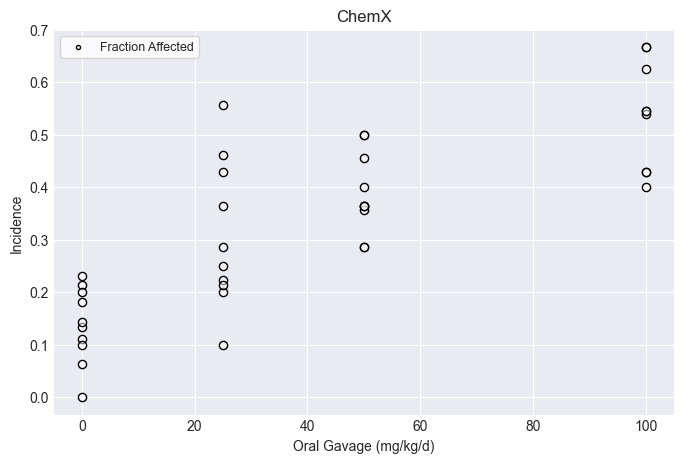

In [26]:
dataset = pybmds.NestedDichotomousDataset(
    name="ChemX",
    dose_name="Oral Gavage",
    dose_units="mg/kg/d",
    doses= [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
        50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        100, 100, 100, 100, 100, 100, 100, 100, 100
    ],
    litter_ns = [
        16, 9, 15, 14, 13, 9, 10, 14, 10, 11,
        14, 9, 14, 9, 13, 12, 10, 10, 11, 14,
        11, 11, 14, 11, 10, 11, 10, 15, 7, 14,
        11, 14, 12, 13, 12, 14, 11, 8, 10
    ],
    incidences = [
        1, 1, 2, 3, 3, 0, 2, 2, 1, 2,
        4, 5, 6, 2, 6, 3, 1, 2, 4, 3,
        4, 5, 5, 4, 5, 4, 5, 6, 2, 4,
        6, 6, 8, 7, 8, 6, 6, 5, 4
    ],
    litter_covariates = [
        16, 9, 15, 14, 13, 9, 10, 14, 10, 11,
        14, 9, 14, 9, 13, 12, 10, 10, 11, 14,
        11, 11, 14, 11, 10, 11, 10, 15, 7, 14,
        11, 14, 12, 13, 12, 14, 11, 8, 10
    ]
)

fig = dataset.plot()

## Single model fit

If you want to fit only one model to your dataset, you can fit the specific model to the dataset and print the results, such as the BMD, BMDL, BMDU, p-value, AIC, etc.

For example, to execute the Nested Logistic model:

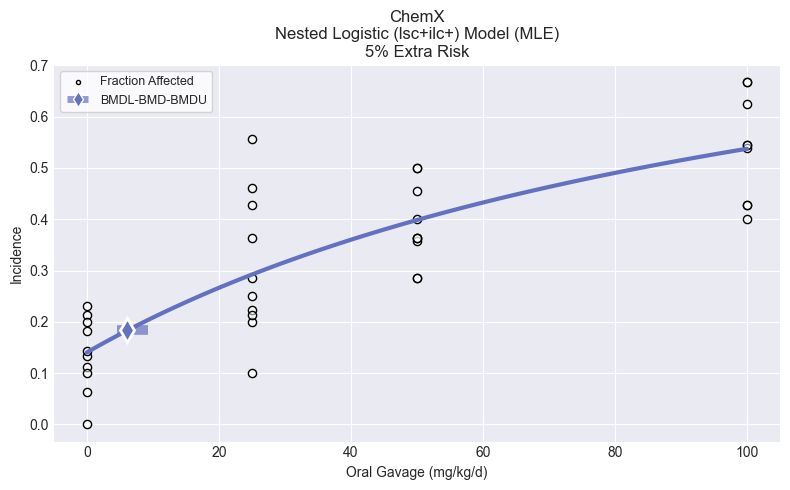

In [27]:
from pybmds.models import nested_dichotomous

model = nested_dichotomous.NestedLogistic(dataset)
model.execute()
fig = model.plot()

An output report can be generated after execution:

In [28]:
print(model.text())

Nested Logistic (lsc+ilc+) Model
══════════════════════════════

Version: pybmds 25.2a2 (bmdscore 25.1)

Input Summary:
╒══════════════════════════════╤═══════════════════════╕
│ BMR                          │ 5% Extra Risk         │
│ Confidence Level (one sided) │ 0.95                  │
│ Litter Specific Covariate    │ Overall Mean (11.692) │
│ Intralitter Correlation      │ Estimate              │
│ Estimate Background          │ True                  │
│ Bootstrap Runs               │ 3                     │
│ Bootstrap Iterations         │ 1000                  │
│ Bootstrap Seed               │ 741                   │
╘══════════════════════════════╧═══════════════════════╛

Parameter Settings:
╒═════════════╤═══════════╤═══════╤════════╕
│ Parameter   │   Initial │   Min │    Max │
╞═════════════╪═══════════╪═══════╪════════╡
│ a           │         0 │     0 │  1     │
│ b           │         0 │   -18 │ 18     │
│ theta1      │         0 │     0 │  1     │
│ theta2      │    

### Change input settings


The default settings use a BMR of 10% Extra Risk and a 95% confidence interval. Settings can be edited as shown below when executing a single model:

In [ ]:
model = nested_dichotomous.NestedLogistic(dataset, settings={
    "bmr": 0.15,
    "bmr_type": pybmds.DichotomousRiskType.AddedRisk
})
print(model.settings.tbl())

BMR settings are similar to standard dichotomous models. Nested Dichotomous models can be run with different mdoeling settings for  the Litter Specific Covariance (lsc) and the Intralitter Correlation (ilc):

In [ ]:
from pybmds.types.nested_dichotomous import LitterSpecificCovariate, IntralitterCorrelation

model = nested_dichotomous.NestedLogistic(dataset, settings={
    "litter_specific_covariate": LitterSpecificCovariate.Unused,
    "intralitter_correlation": IntralitterCorrelation.Zero,
})
print(model.settings.tbl())

Choices for `LitterSpecificCovariate` include:

In [ ]:
for item in LitterSpecificCovariate:
    print(f"{item.name}: {item.value}")

Choices for `IntralitterCorrelation` include:

In [ ]:
for item in IntralitterCorrelation:
    print(f"{item.name}: {item.value}")

### Change parameter settings

To preview initial parameter settings:

In [ ]:
model = nested_dichotomous.NestedLogistic(dataset)
print(model.priors_tbl())

Initial parameter settings can also can be modified:

In [ ]:
model.settings.priors.update('a', initial_value=2, min_value=-10, max_value=10)
model.settings.priors.update('phi1', initial_value=10, min_value=5, max_value=100)
print(model.priors_tbl())

## Multiple model fit (sessions) and model recommendation

A Session allows for multiple different models to be executed and potentially compared for model recommendation and selection.

A common pattern may be to add multiple versions of the same model with varying settings for the litter specific covariate and intralitter correlation.  In the example below, we run instances of the Nested Logistic model, with different settings:

In [ ]:
session = pybmds.Session(dataset=dataset)

for lsc in [LitterSpecificCovariate.Unused, LitterSpecificCovariate.OverallMean]:
    for ilc in [IntralitterCorrelation.Zero, IntralitterCorrelation.Estimate]:
        session.add_model(
            pybmds.Models.NestedLogistic,
            settings={
                "bmr": 0.15,
                "litter_specific_covariate": lsc,
                "intralitter_correlation": ilc,
            }
        )

session.execute()
fig = session.plot()

Model recommendation can be enabled, and if a recommendation is made, you can view outputs:

In [ ]:
session.recommend()

if session.recommended_model is not None:
    fig = session.recommended_model.plot()
    print(session.recommended_model.text())

### Select a best-fitting model

You may recommend a best fitting model based on a decision tree, but expert judgment is required for model selection.

You can select any model; in this example, we agree with the recommended model:

In [ ]:
session.select(model=session.recommended_model, notes="Lowest AIC; recommended model")

Generated outputs (Excel, Word, JSON) would include model selection information.

## Additional Nested Dichotomous Plottting

It has been noted that some cases arise where models with intralitter correlation (ILC) estimated give a much better fit than corresponding models where ILC was not included in the model.  This happens even when the estimated mean response rates (from the dose-response equation) appear very similar across those two models and very closely match the observations (as summarized in the traditional dose-response plots as the total number of responders over the total number of fetuses, ignoring litter membership). 

For example, consider the following nested dichotomous data and modeling results:

In [55]:
import pybmds

dataset = pybmds.NestedDichotomousDataset(    
    name="Nested Dataset",
    dose_units="ppm",
    doses= [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
    ],
    litter_ns = [
        15, 15, 15, 12, 12, 16, 14, 13, 12, 16, 12, 14, 12, 15, 15, 16, 18, 14, 16, 17, 14, 9, 14,
        14, 14, 15, 7, 16, 12, 14, 14, 15, 16, 14, 15, 8, 15, 16, 14, 13, 17, 14, 17, 15, 14, 13, 16,
        15, 13, 14, 15, 14, 16, 16, 15, 15, 13, 15, 15, 15, 13, 14, 2, 16, 13, 17, 13, 16, 13, 17,
        13, 16, 15, 15, 12, 13, 16, 9, 11, 3, 7, 7, 13, 10, 13, 11, 17, 15, 13, 15, 13,
    ],
    incidences = [
        0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 6, 0, 1, 0, 0, 0, 3, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 7, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 12, 1, 1, 2, 0, 2, 1, 1, 5, 1, 6, 2, 0, 1, 1, 2, 0,
        13, 14, 15, 15, 12, 13, 16, 9, 11, 3, 7, 7, 13, 6, 13, 11, 17, 15, 13, 15, 13,
    ],
    litter_covariates = [
        15, 15, 15, 12, 12, 16, 14, 13, 12, 16, 12, 14, 12, 15, 15, 16, 18, 14, 16, 17, 14, 9, 14,
        14, 14, 15, 7, 16, 12, 14, 14, 15, 16, 14, 15, 8, 15, 16, 14, 13, 17, 14, 17, 15, 14, 13, 16,
        15, 13, 14, 15, 14, 16, 16, 15, 15, 13, 15, 15, 15, 13, 14, 2, 16, 13, 17, 13, 16, 13, 17,
        13, 16, 15, 15, 12, 13, 16, 9, 11, 3, 7, 7, 13, 10, 13, 11, 17, 15, 13, 15, 13,
    ]
)

# create a BMD session
session = pybmds.Session(dataset=dataset)

# add all combinations of litter specific covariate and intralitter correlation models
for lsc in [LitterSpecificCovariate.Unused, LitterSpecificCovariate.OverallMean]:
    for ilc in [IntralitterCorrelation.Zero, IntralitterCorrelation.Estimate]:
        session.add_model(
            pybmds.Models.NestedLogistic,
            settings={
                "bmr": 0.10,
                "litter_specific_covariate": lsc,
                "intralitter_correlation": ilc,
            }
        )

# execute the session
session.execute()

def summary_table(session):
    data = []
    for model in session.models:
        data.append([
            model.name(),
            model.results.bmdl,
            model.results.bmd,
            model.results.bmdu,
            model.results.combined_pvalue,
            model.results.aic
        ])

    df = pd.DataFrame(
        data=data,
        columns=["Model", "BMDL", "BMD", "BMDU", "P-Value", "AIC"]
    )
    return df

summary_table(session)

,Model,BMDL,BMD,BMDU,P-Value,AIC
0,Nested Logistic (lsc-ilc-),12.572009,13.063484,15.240732,0.000000,665.740960
1,Nested Logistic (lsc-ilc+),12.435467,13.574733,20.362099,0.450667,530.921481
2,Nested Logistic (lsc+ilc-),13.067425,13.612285,20.418427,0.000000,624.327266
3,Nested Logistic (lsc+ilc+),13.051739,14.221449,21.332173,0.548000,520.369282


Note that both models with ILC estimated (lsc+ilc+ and lsc-ilc=) both have p-values > 0.10 (indicating adequate fit) but that all variations of the nested logistic model have very similar BMD and BMDL values. 
 
The plots of all variations of the nested logistic model can be displayed and compared:

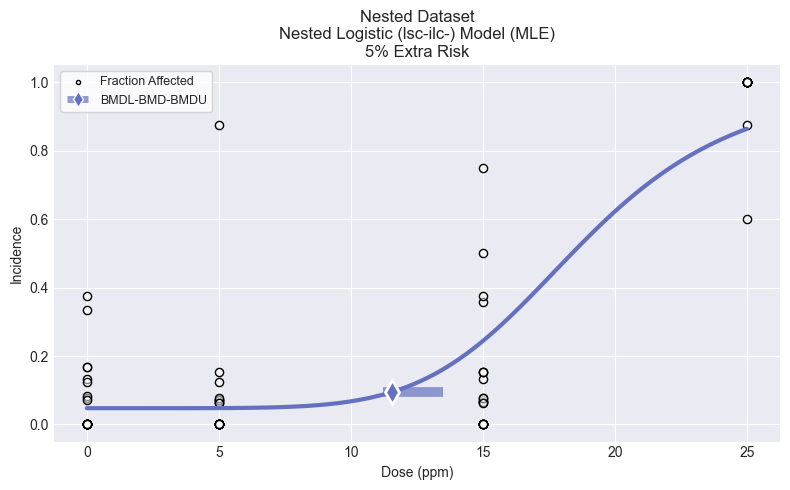

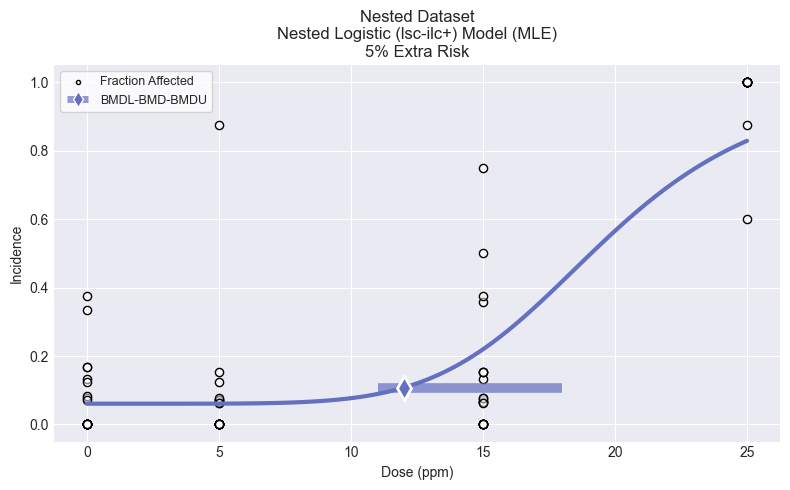

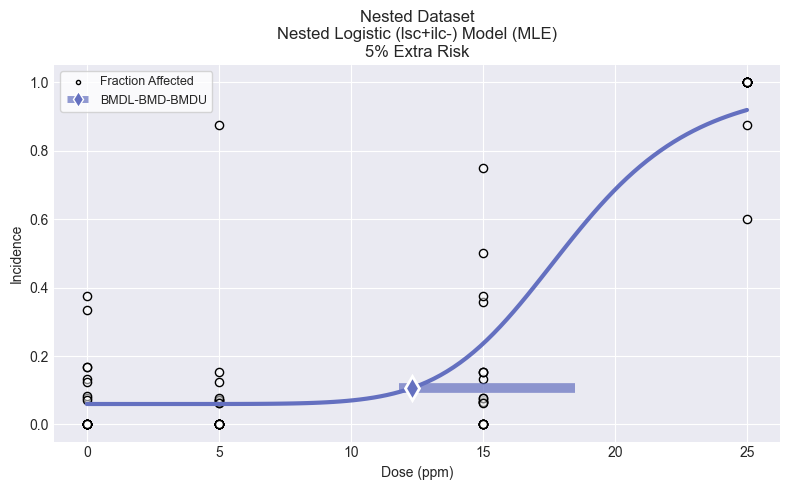

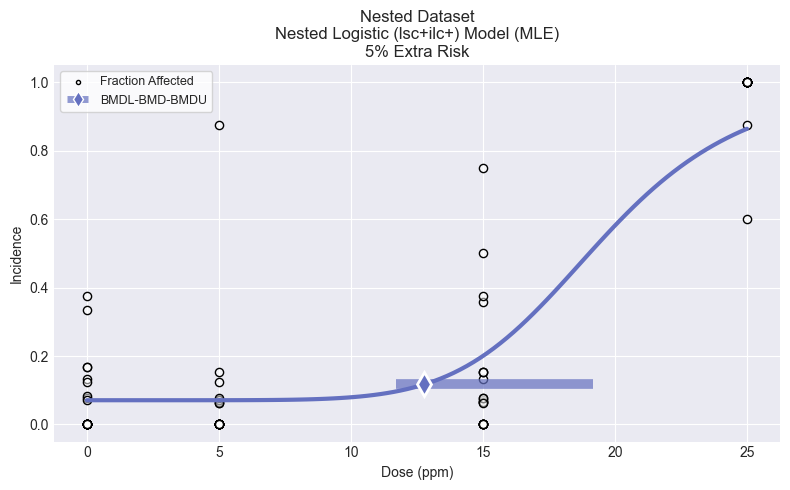

In [58]:
plots = []
for lsc in [LitterSpecificCovariate.Unused, LitterSpecificCovariate.OverallMean]:
    for ilc in [IntralitterCorrelation.Zero, IntralitterCorrelation.Estimate]:
        model = nested_dichotomous.NestedLogistic(
            dataset,
            settings={
                "litter_specific_covariate": lsc,
                "intralitter_correlation": ilc,
            }
        )
        model.execute()
        fig = model.plot()
        plots.append(fig)
        fig = fig # Display each plot in the notebook

As can be seen above, all the variations of the nested logistic model appear to provide adequate fit to the observed responses.  However, the traditional dose-response plots do not provide enough information to visually ascertain why certain variations of the nested logistic model do not statistically fit the observed data.  

Therefore, for nested dichotomous data, there is another plot that can be generated that plots the observed number of litters with a certain number of responding fetuses and the model estimate of that value.  Then, users can visually ascertain how well each variation of the nested logistic model predicts the "correct" observed number of litters with a particular number of responding fetuses.  

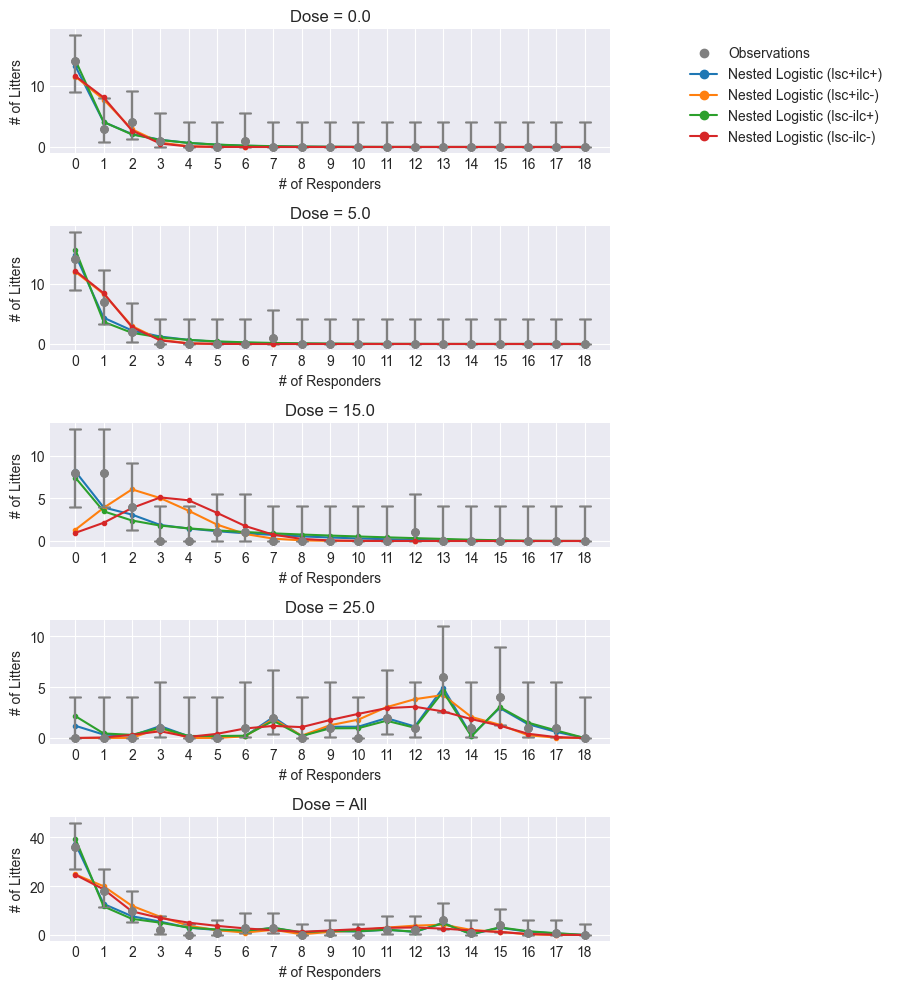

In [59]:
from pybmds.plotting.nested_dichotomous import dose_litter_response_plot  

fig = dose_litter_response_plot(session)

As can be seen above, at dose = 0 ppm, the models with ILC estimated (i.e., ilc+) clearly do a much better job at predicting the number of litters with 1 responding fetuses than models without ILC. At dose = 5 ppm, the ilc+ models do a better job at predicting the number of litters with 0 or 1 responding litters compared the ilc- models. These plots can be used to compare model predictions of fit at each individual dose group or across all doses.  In particular, it appears that the failure of the ilc- models to adequately predict the number of litters with 0 - 5 responding fetuses in the 15 ppm dose group may be driving the observation of p-values < 0.10 for those models.